<a href="https://colab.research.google.com/github/paulocavalin/mitpe-ml/blob/main/src/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

### Load tik tac toe dataset

In [4]:
!wget -cv https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data

--2023-05-22 13:47:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25866 (25K) [application/x-httpd-php]
Saving to: ‘tic-tac-toe.data’

tic-tac-toe.data    100%[===================>]  25.26K  --.-KB/s    in 0.1s    

2023-05-22 13:47:16 (196 KB/s) - ‘tic-tac-toe.data’ saved [25866/25866]



In [5]:
df = pd.read_csv('tic-tac-toe.data')

In [6]:
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [ ]:
 df.loc[df.positive == 'positive'].count()

x           625
x.1         625
x.2         625
x.3         625
o           625
o.1         625
x.4         625
o.2         625
o.3         625
positive    625
dtype: int64

In [ ]:
 df.loc[df.positive == 'negative'].count()

x           332
x.1         332
x.2         332
x.3         332
o           332
o.1         332
x.4         332
o.2         332
o.3         332
positive    332
dtype: int64

### Extract data columns

In [ ]:
X = df.loc[:, df.columns != 'positive'].to_numpy()

In [ ]:
X

array([['x', 'x', 'x', ..., 'o', 'x', 'o'],
       ['x', 'x', 'x', ..., 'o', 'o', 'x'],
       ['x', 'x', 'x', ..., 'o', 'b', 'b'],
       ...,
       ['o', 'x', 'o', ..., 'x', 'o', 'x'],
       ['o', 'x', 'o', ..., 'x', 'o', 'x'],
       ['o', 'o', 'x', ..., 'o', 'x', 'x']], dtype=object)

### Extract label column

In [ ]:
Y = df['positive']

In [ ]:
Y

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
952    negative
953    negative
954    negative
955    negative
956    negative
Name: positive, Length: 957, dtype: object

## Convert CATEGORICAL features to 1-HOT-ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.categories_

[array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object),
 array(['b', 'o', 'x'], dtype=object)]

In [ ]:
X_1hot = enc.transform( X ).toarray()

In [ ]:
X_1hot

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
X[3]

array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b'], dtype=object)

In [ ]:
X_1hot[3]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

## Split data set into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_1hot, Y, test_size=0.33, random_state=42)

## Train classifiers 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
Y_test[:10]

835    negative
477    positive
350    positive
890    negative
854    negative
261    positive
215    positive
334    positive
86     positive
908    negative
Name: positive, dtype: object

In [ ]:
y_pred[:10]

array(['negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative'],
      dtype=object)

### Predict the probability of positive winning

In [ ]:
unseen_X = enc.transform([['x', 'o', 'b',  
                           'x', 'o', 'x', 
                           'b', 'o', 'b']])

print(clf.predict(unseen_X))
print(clf.predict_proba(unseen_X))

['negative']
[[0.74145624 0.25854376]]


## Evaluation metrics

### Compute accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test, y_pred)

0.9746835443037974

### Evaluate model with cross validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
scores = cross_val_score(clf, X_1hot, Y, cv=10)

In [ ]:
scores

array([0.97916667, 1.        , 0.98958333, 1.        , 1.        ,
       0.96875   , 0.98958333, 1.        , 1.        , 0.83157895])

In [ ]:
np.mean(scores)

0.9758662280701754

### Compute ROC AUC score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
clf.predict_proba(X_1hot)

array([[0.4979642 , 0.5020358 ],
       [0.33419455, 0.66580545],
       [0.23565321, 0.76434679],
       ...,
       [0.53427703, 0.46572297],
       [0.22562193, 0.77437807],
       [0.18214273, 0.81785727]])

In [ ]:
clf.predict_proba(X_1hot)[:, 1]

array([0.5020358 , 0.66580545, 0.76434679, 0.78117086, 0.721313  ,
       0.73399352, 0.66673634, 0.68768166, 0.87338519, 0.8333709 ,
       0.8462583 , 0.87561218, 0.79877671, 0.88693384, 0.92738406,
       0.93357983, 0.91064264, 0.9157151 , 0.88735299, 0.89658342,
       0.64040006, 0.50106205, 0.6649382 , 0.76364449, 0.7805043 ,
       0.72052934, 0.82996493, 0.77968986, 0.73351419, 0.79772538,
       0.68715445, 0.81275023, 0.87603064, 0.87295384, 0.83282932,
       0.84575085, 0.92425576, 0.89844889, 0.87311362, 0.90791058,
       0.84593881, 0.91561669, 0.94642526, 0.88271824, 0.80931634,
       0.8934718 , 0.93176297, 0.93761026, 0.91593959, 0.92946842,
       0.90525551, 0.91316254, 0.76925942, 0.70736391, 0.7268021 ,
       0.85550271, 0.81105957, 0.76951519, 0.82709652, 0.72708823,
       0.84037625, 0.8955207 , 0.78503092, 0.67313004, 0.80273982,
       0.86885734, 0.87939734, 0.84093705, 0.90127539, 0.83734759,
       0.91049996, 0.94306049, 0.94799371, 0.92965909, 0.93373

In [ ]:
y_prob = clf.predict_proba(X_1hot)[:, 1]

In [ ]:
roc_auc_score(Y, y_prob)

0.993489156626506

### Show confusion matrix

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)

In [ ]:
cm 

array([[ 99,   3],
       [  5, 209]])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

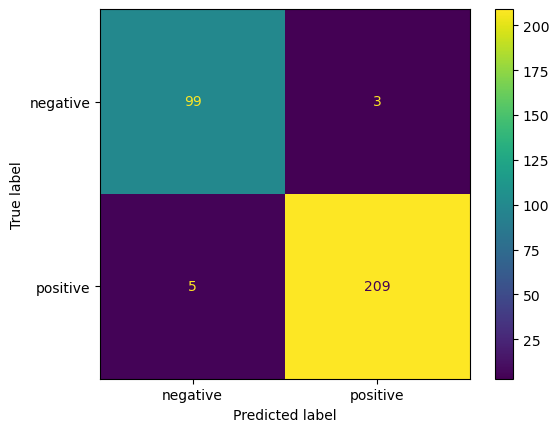

In [ ]:
disp.plot()

### Wrap last steps into a function

In [ ]:
def train_and_evaluate_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    print(f'Accuracy: {accuracy_score(Y_test, y_pred)}')
    
    y_probs = clf.predict_proba(X_test)[:, 1]
    print(f'ROC AUC score: {roc_auc_score(Y_test, y_probs)}')
    
    cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()

Accuracy: 0.9746835443037974
ROC AUC score: 0.9953271028037384


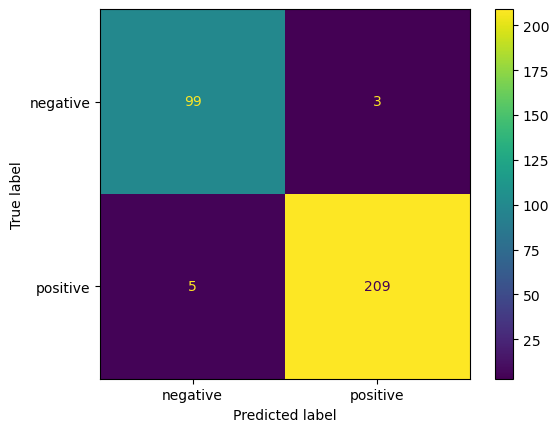

In [ ]:
train_and_evaluate_classifier( LogisticRegression(random_state=0), X_train, Y_train, X_test, Y_test)

Accuracy: 0.8924050632911392
ROC AUC score: 0.9424592266813268


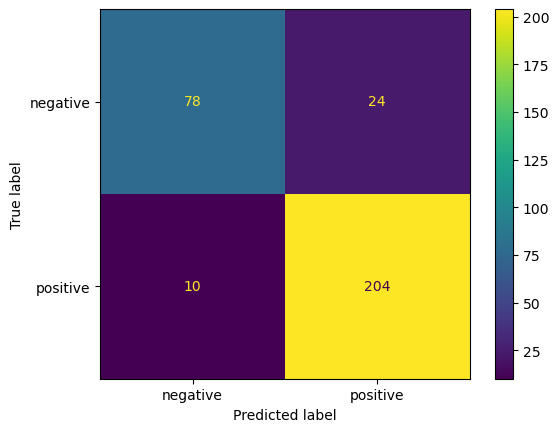

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_and_evaluate_classifier( KNeighborsClassifier(n_neighbors=3), X_train, Y_train, X_test, Y_test)

Accuracy: 0.819620253164557
ROC AUC score: 0.7718984790177753


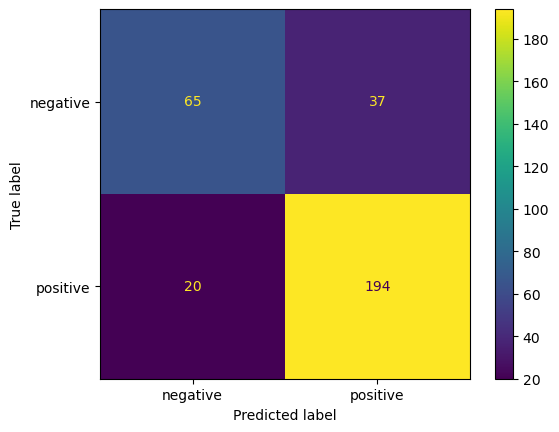

In [ ]:
train_and_evaluate_classifier( KNeighborsClassifier(n_neighbors=1), X_train, Y_train, X_test, Y_test)